In [2]:
import emoji 
import csv
import datetime
import re
from collections import Counter
import timeit
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Desktop
#filepath = 'C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\concat_all_tweets.txt'

# Mobile
filepath = 'C:\\Users\\Wilm\\Documents\\GitHub\\twitter_stream\\tweet files\\concat_all_tweets.txt'

In [4]:
# merge all several tweet Files to one big file: 'concat_all_tweets.txt'

# uncomment for safety reasons

"""
allfiles = glob.iglob('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\*.txt')


for file in allfiles:
    with open(file, 'r+', encoding = 'utf-8') as f:
        with open('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\concat_all_tweets.txt', 'a', encoding = 'utf-8') as f2:
            for line in f:
                if not line == '\n':
                    f2.write(line)
"""

In [3]:
# creating DataFrame

df = pd.DataFrame(pd.read_csv(filepath, header = None, index_col = False))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775023 entries, 0 to 2775022
Data columns (total 4 columns):
0    object
1    int64
2    float64
3    object
dtypes: float64(1), int64(1), object(2)
memory usage: 84.7+ MB


In [4]:
df.columns=['created_at','id_str','in_reply_to_user_id_str','raw_text']

# entfernt Spalte "created_at"
df = df.drop(columns='created_at')

In [5]:
# drop tweets which startswith 'RT' --> get only original tweets, without Retweets

df_filtered_by_RT = df[~df.raw_text.str.startswith('RT')]

df_filtered_by_RT.head(1)

,id_str,in_reply_to_user_id_str,raw_text
0,1013820394304749573,NaN,People talking shit on México when their team ...


In [6]:
def extract_chars(my_str):     
    return ''.join([c for c in my_str if not(c in emoji.UNICODE_EMOJI)])

def anonymize_username(my_str):
    anonymized_text = ['@username' if x.startswith('@') else x for x in list(my_str.split())]
    return ' '.join(anonymized_text)

def anonymize_hashtag(my_str): 
    return ' '.join(['#hashtag' if x.startswith('#') else x for x in list(my_str.split())])

def delete_links(my_str): 
    return ' '.join(['' if x.startswith('https') else x for x in list(my_str.split())])
# to do: hashtags und links entfernen

df_clean_text = df['raw_text'].apply(lambda x: delete_links(anonymize_hashtag(anonymize_username(extract_chars(x)))))

In [7]:
def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)

df_extr_emojis = df['raw_text'].apply(lambda x: extract_emojis(x))

In [8]:
# unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

# assign all new functions to df
new_df = df_filtered_by_RT.assign(clean_text = df_clean_text, extr_emojis = df_extr_emojis)
new_df.head()

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
0,1013820394304749573,NaN,"People talking shit on México when their team didn’t even participate in the #worldcup like sit down 😂""2018-07-02 16:23:12","People talking shit on México when their team didn’t even participate in the #hashtag like sit down ""2018-07-02 16:23:12",😂
1,1013820396154564609,NaN,We're done here#gotgotgot#WorldCup https://t.co/XJe3bzorST,We're done here#gotgotgot#WorldCup,
2,1013820399090454528,NaN,"I was going for Mexico, But i like Brazil too so its cool, Neymar still in it lets see if he can go all the way #WorldCup","I was going for Mexico, But i like Brazil too so its cool, Neymar still in it lets see if he can go all the way #hashtag",
3,1013820400155779072,NaN,Serbian President Vucic Believed in Russia's Victory Over Spain at World Cup - Ambassador https://t.co/7ffKHBwGl8… https://t.co/zakD00KJyH,Serbian President Vucic Believed in Russia's Victory Over Spain at World Cup - Ambassador,
4,1013820402907267072,NaN,Bshshshshshs https://t.co/qdIiKoQViV,Bshshshshshs,


In [9]:
# rows only with emoji

df_emoji_rows = new_df[new_df.extr_emojis != '']
df_emoji_rows.head()

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
0,1013820394304749573,NaN,"People talking shit on México when their team didn’t even participate in the #worldcup like sit down 😂""2018-07-02 16:23:12","People talking shit on México when their team didn’t even participate in the #hashtag like sit down ""2018-07-02 16:23:12",😂
8,1013820404601942017,NaN,"Did you hear about the hungry clock? It went back four seconds. 😄 #Gemstars #Jokes #Smile 😄""2018-07-02 16:23:15","Did you hear about the hungry clock? It went back four seconds. #hashtag #hashtag #hashtag ""2018-07-02 16:23:15",😄😄
18,1013820413732782082,NaN,"Now that's what you call a game....action, suspense, drama &amp; comedy! 🇧🇷⚽🏆#BRAMEX #WorldCup #soccer… https://t.co/16nhJna0Yz","Now that's what you call a game....action, suspense, drama &amp; comedy! 🇧🇷#BRAMEX #hashtag #hashtag",⚽🏆
24,1013820425028194307,NaN,"Listening to the match, think it’s Brazil’s to loose... maybe. It’d b class if #Firminho done a ‘no look’ lifting of the cup 😵🏆#WorldCup2018","Listening to the match, think it’s Brazil’s to loose... maybe. It’d b class if #hashtag done a ‘no look’ lifting of the cup #hashtag",😵🏆
38,1013820438043152384,NaN,Well done Brazil! But Neymar be trippin’ 😂😂😂 #neymar #brazil #fifaworldcup #footballmemes #southafricanblogger https://t.co/8M6BfQ5Ne8,Well done Brazil! But Neymar be trippin’ #hashtag #hashtag #hashtag #hashtag #hashtag,😂😂😂


In [10]:
# zählen der emoji vorkommen
df_emoji_rows.extr_emojis.value_counts().head(20)

😂       17098
⚽       7636 
😂😂😂     7306 
😂😂      6281 
❤       5976 
🤔       4532 
😍       3961 
🙄       2848 
👏       2797 
🏴       2704 
🙌       2649 
🔥       2529 
👍       2507 
😉       2386 
😭       2350 
😂😂😂😂    2336 
😎       2263 
🤣       2257 
😊       2248 
🙏       2196 
Name: extr_emojis, dtype: int64

In [13]:
# percantage of TOP 20 Emoji_all

series_emoji_all_top20 = df_emoji_rows.extr_emojis.value_counts().head(20)
df_emoji_all_top20 = series_emoji_all_top20.to_frame()
df_emoji_all_top20['emoji'] = df_emoji_all_top20.index
df_emoji_all_top20['Anzahl'] = df_emoji_all_top20['extr_emojis']
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'extr_emojis')
df_emoji_all_top20.reset_index(inplace=True)
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'index')
df_emoji_all_top20['Prozent'] = df_emoji_all_top20['Anzahl']/df_emoji_all_top20['Anzahl'].sum() * 100
df_emoji_all_top20_transpose = df_emoji_all_top20.transpose()
df_emoji_all_top20

,emoji,Anzahl,Prozent
0,😂,17098,20.148480
1,⚽,7636,8.998350
2,😂😂😂,7306,8.609474
3,😂😂,6281,7.401603
4,❤,5976,7.042187
5,🤔,4532,5.340561
6,😍,3961,4.667688
7,🙄,2848,3.356116
8,👏,2797,3.296017
9,🏴,2704,3.186425


In [14]:
# percantage of TOP 20 Emoji_single


series_emoji_single_top20 = df_emoji_rows['extr_emojis'][df_emoji_rows['extr_emojis'].str.len() == 1].value_counts().head(20)
df_emoji_single_top20 = series_emoji_single_top20.to_frame()
df_emoji_single_top20['emoji'] = df_emoji_single_top20.index
df_emoji_single_top20['Anzahl'] = df_emoji_single_top20['extr_emojis']
df_emoji_single_top20 = df_emoji_single_top20.drop(columns = 'extr_emojis')
df_emoji_single_top20.reset_index(inplace=True)
df_emoji_single_top20 = df_emoji_single_top20.drop(columns = 'index')
df_emoji_single_top20['Prozent'] = df_emoji_single_top20['Anzahl']/df_emoji_single_top20['Anzahl'].sum() * 100
df_emoji_top20_transpose = df_emoji_single_top20.transpose()
df_emoji_single_top20

,emoji,Anzahl,Prozent
0,😂,17098,22.691741
1,⚽,7636,10.134176
2,❤,5976,7.931094
3,🤔,4532,6.014678
4,😍,3961,5.256871
5,🙄,2848,3.779745
6,👏,2797,3.712060
7,🏴,2704,3.588634
8,🙌,2649,3.515641
9,🔥,2529,3.356382


In [15]:
# changing matplotlib font

# Along with matplotlib.pyplot, for this one
# you also need to import matplotlib itself
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Segoe UI Emoji"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

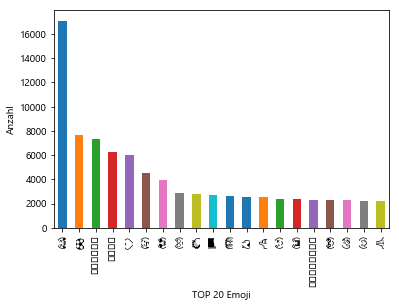

In [47]:
# vorkommen aller emoji
df_emoji_rows.extr_emojis.value_counts().head(20).plot.bar()
plt.xlabel('TOP 20 Emoji')
plt.ylabel('Anzahl')

plt.savefig('df_2_vorkommen_emoji_alle.png', bbox_inches='tight')

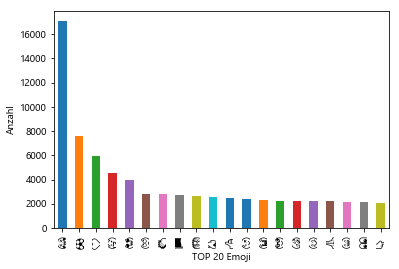

In [46]:
# vorkommen von nur einzelnen emoji
df_emoji_rows['extr_emojis'][df_emoji_rows['extr_emojis'].str.len() == 1].value_counts().head(20).plot.bar()
plt.xlabel('TOP 20 Emoji')
plt.ylabel('Anzahl')

plt.savefig('df_2_vorkommen_emoji_einzeln.png', bbox_inches='tight')

In [33]:
### unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)


#new_df.clean_text[new_df['clean_text']==997055707471003653]
type(df.iloc[15]['in_reply_to_user_id_str'])

numpy.float64

In [ ]:
Zipfsche Gesetz
y-Achse = relative Worthäufigkeit bzw. Emojihäufigkeit
x-Achse = Rang
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.zipf.html

In [19]:
# test/WIP: find a response to an initial tweet
df_initial_tweets = df_emoji_rows[df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji_rows[~df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets with reply_id
df_response_tweets['in_reply_to_user_id_str'] = df_response_tweets['in_reply_to_user_id_str'].astype(np.int64)

for id_str in df_initial_tweets['id_str']:
    for re_id in df_response_tweets['in_reply_to_user_id_str'].head(200):
        if id_str == re_id:
            print('id_str: ', id_str)
            print('re_id: ', re_id)
            print('found a match')
# id_str type= int
# in_reply_to_user_id_str type = float


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


id_str:  1013842967482847232
re_id:  1013842967482847232
found a match
id_str:  1013846031681900544
re_id:  1013846031681900544
found a match


In [20]:
1013842967482847232
df_initial_tweets['id_str'] == '1013842967482847232'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [12]:
### Conversations zusammenstellen
# finding all tweets that response to an initial tweet
# Conversation = initial_tweet & reply_tweet


df_initial_tweets = df_emoji_rows[df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji_rows[~df_emoji_rows['in_reply_to_user_id_str'].isnull()] # tweets with reply_id

# transform datatype in "in_reply_to_user_id_str" from numpy.float64 to np.int64
df_response_tweets['in_reply_to_user_id_str'] = df_response_tweets['in_reply_to_user_id_str'].astype(np.int64)


dialogues_1vs1 = []
    
for index, row in df_initial_tweets.head().iterrows():
    #print(row['clean_text'])
    response_tweet_list = [x.strip() for x in row['clean_text'].split(',')]
    for response_tweet_id in response_tweet_list:
        response_tweet_id = int(response_tweet_id)
        if len(response_tweet_list) == 1: # conversation besteht lediglich aus zwei aussagen (initaler und antwortender tweet)
        #print('response_tweet_id: ', response_tweet_id, type(response_tweet_id))
            for tweet_id in df_initial_tweets['id_str']:
                #print('tweet_id: ', tweet_id, type(tweet_id))
                if response_tweet_id == tweet_id: 
                    #print('\nConversation\n')
                    #print('initial_tweet')
                    #print(row['tweet_id'], row['text'])
                    #print(row['text'])
                    initial_tweet = row['raw_text']

                    #print('response_tweet')
                    response_tweet = df_response_tweets.loc[df_response_tweets['id_str']== response_tweet_id]['text']
                    #print(response_tweet.values[0])
                    response_tweet = df_response_tweets.loc[df_response_tweets['id_str']== response_tweet_id]['text']
                    dialogues_1vs1.append([initial_tweet, response_tweet.values[0]])
print('done')

c:\users\wilm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ValueError: invalid literal for int() with base 10: 'My morning just got better !  @BTS_twt #iVoteBTSBBMAs https://t.co/EoJ83MA5Pz'

In [ ]:
### quantitative Analyse von Abhängigkeiten
# bei gegebenen emoji im initial Tweet, welche top 3 emoji im reply Tweet folgen?
# x Achse: relative Frequenz von reply-tweet-emoji (Top 5)
# y Achse: initial-tweet-emoji sortiert nach Häufigkeit (häufigster emoji links) (insgesamt Top 5 emoji)

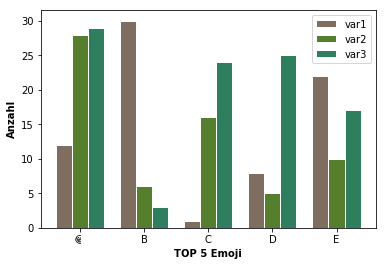

In [21]:
### Spielwiese

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('TOP 5 Emoji', fontweight='bold')
plt.ylabel('Anzahl', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['😂', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
